Consider a really simple case:

$M = 2$  
$S = 2$

Suppose we use an unbiased estimator so $a_2 = 1 - a_1$ 

Attendance the last 4 weeks was (0, 100, 0, 100)

In [4]:
from matplotlib import pyplot as plt
import numpy as np

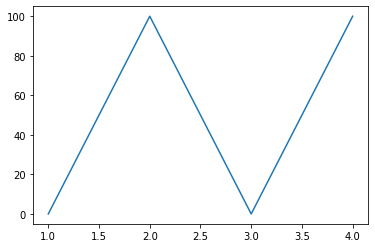

In [7]:
x = np.arange(1,5)
y = [0,100,0,100]
plt.plot(x, y)

What happens next week?

$$
\hat{N}^{(i)}(5) = 100 a_1^{(i)} \\
\hat{N}^{(i)}(4) = 100 (1 - a_1^{(i)}) \\ 
\hat{N}^{(i)}(3) = 100 a_1^{(i)} \\
$$

where

$$
N(4) = 100 \\
N(3) = 0
$$

So to minimize

$$|\hat{N}(4) - N(4)| + |\hat{N}(3) - N(3)|$$

each agent will chose the strategy with the smallest possible $a$.  They will predict

$$
\hat{N}^{(*)}(5) = 100 a_{min} 
$$

and attend if

$$
a_{min} < 0.6
$$

So

$$
P(\text{prediction} < 60) \\
= P(100 a_{min} < 60) \\
= 1 - P(a_{min} > 0.6) \\
= 1 - P(a > 0.6)^S \\
= 1 - 0.4^S \\
$$

Likewise, with history (100, 0, 100, 0), the probability of attending is:

$$
P(\text{prediction} < 60) \\
= P(100 (1 - a_{min}) < 60) \\
= P(1 - a_{min}) < 0.6) \\
= P(0.4 < a_{min}) \\
= P(a_{min} > 0.4) \\
= P(a > 0.4)^S
= 0.6^S
$$

In [9]:
def make_strategies(rng, strategies, memory):
    # weights should sum to 1
    # essentially, we are partitioning the [0,1] interval
    # and taking the size of each sub-interval
    # TODO: add negative weights?
    w = rng.uniform(size=(strategies, memory-1))
    w.sort(axis=1)
    offsets = np.hstack([w[:, :], np.ones(shape=(strategies,1))])
    return offsets - np.hstack([np.zeros(shape=(strategies,1)), w[:, :]])

#### The (0,100,0,100) case with 2 strategies

We expect agents to attend with probability 0.84.
Total weekly attendance should have mean 84.0 and variance 13.440000000000003
Average attendance: 84.174
Variance of attendance: 13.049724000000001


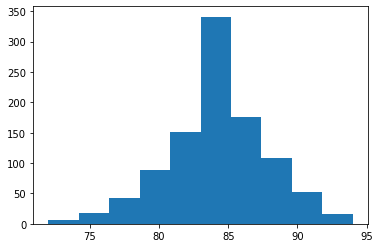

In [13]:
agents = 100 # number of agents
threshold = 60 # threshold for attendance
strategies = 2 # number of strategies
# number of weeks back in predictor function
# AND number of weeks back to look when selecting a predictor
memory = 2
# number of rounds to run the simulation
n_iter = 1
trials = 1000

# random seed for numpy
seed=25


p = (1 - 0.4**strategies)
print(f"We expect agents to attend with probability {p}.")
print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")

results = np.empty(trials)

rng = np.random.default_rng(seed)

for tr in range(trials):
    # each row is a strategy
    strats = [
        make_strategies(rng, strategies, memory) for _ in range(agents)
    ]

    start = np.array([0,100,0,100])

    # weekly attendance count
    # the first 2*memory weeks are randomly generated
    # to seed the strategies
    hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

    # index of week
    # we need some starting history to begin making selections
    t = memory * 2

    # Record the index of the optimal strategy 
    # on each iteration.
    # each row corresponds to an agent
    # each column corresponds to a week
    best_strats = np.zeros((agents, len(hist)))

    # record each agent's prediction on each iteration
    pred_history = np.zeros((agents, len(hist)))

    # construct time windows for evaluating strategies

    # The columns begin at
    # t - m - 1 
    # t - m
    # ...
    # t - 1
    # t
    # as you go down the column you are looking back
    # to that week's history.
    # so the column beginning at *t - m - 1*
    # generates the prediction for week *t - m*
    # and the rightmost column generates a
    # prediction for next week.
    windows = np.vstack([
        hist[t-memory-i-1: t-i]
        for i in range(memory)
    ])

    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is predicted attendance
        # in increasing order.
        # the last column has the prediction for
        # next week
        predictions = strat.dot(windows)

        # these are the observations that we use to
        # to test our predictions.
        # note that the observation from column 0
        # is not used since its prediction would come
        # from a previous week's history.
        observations = windows[0, 1:]

        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred

    hist[t] = (pred_history[:, t] < threshold).sum()
    results[tr] = hist[t]


plt.hist(results)

print(f"Average attendance: {results.mean()}")
print(f"Variance of attendance: {results.var()}")

#### The (0,100,0,100) case with 3 strategies

We expect agents to attend with probability 0.9359999999999999.
Total weekly attendance should have mean 93.6 and variance 5.990400000000005
Average attendance: 93.605
Variance of attendance: 5.622975000000001


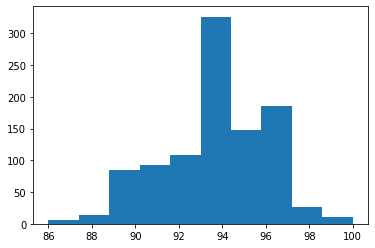

In [15]:
agents = 100 # number of agents
threshold = 60 # threshold for attendance
strategies = 3 # number of strategies
# number of weeks back in predictor function
# AND number of weeks back to look when selecting a predictor
memory = 2
# number of rounds to run the simulation
n_iter = 1
trials = 1000

# random seed for numpy
seed=25


p = (1 - 0.4**strategies)
print(f"We expect agents to attend with probability {p}.")
print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")

results = np.empty(trials)

rng = np.random.default_rng(seed)

for tr in range(trials):
    # each row is a strategy
    strats = [
        make_strategies(rng, strategies, memory) for _ in range(agents)
    ]

    start = np.array([0,100,0,100])

    # weekly attendance count
    # the first 2*memory weeks are randomly generated
    # to seed the strategies
    hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

    # index of week
    # we need some starting history to begin making selections
    t = memory * 2

    # Record the index of the optimal strategy 
    # on each iteration.
    # each row corresponds to an agent
    # each column corresponds to a week
    best_strats = np.zeros((agents, len(hist)))

    # record each agent's prediction on each iteration
    pred_history = np.zeros((agents, len(hist)))

    # construct time windows for evaluating strategies

    # The columns begin at
    # t - m - 1 
    # t - m
    # ...
    # t - 1
    # t
    # as you go down the column you are looking back
    # to that week's history.
    # so the column beginning at *t - m - 1*
    # generates the prediction for week *t - m*
    # and the rightmost column generates a
    # prediction for next week.
    windows = np.vstack([
        hist[t-memory-i-1: t-i]
        for i in range(memory)
    ])

    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is predicted attendance
        # in increasing order.
        # the last column has the prediction for
        # next week
        predictions = strat.dot(windows)

        # these are the observations that we use to
        # to test our predictions.
        # note that the observation from column 0
        # is not used since its prediction would come
        # from a previous week's history.
        observations = windows[0, 1:]

        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred

    hist[t] = (pred_history[:, t] < threshold).sum()
    results[tr] = hist[t]


plt.hist(results)

print(f"Average attendance: {results.mean()}")
print(f"Variance of attendance: {results.var()}")

#### The (0,100,0,100) case with 10 strategies

We expect agents to attend with probability 0.9998951424.
Total weekly attendance should have mean 99.98951424 and variance 0.010484660488373012
Average attendance: 99.992
Variance of attendance: 0.007936000000000002


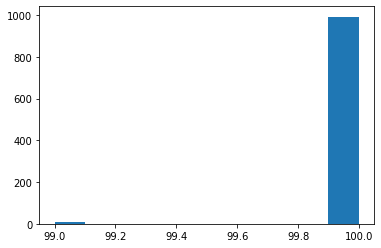

In [14]:
agents = 100 # number of agents
threshold = 60 # threshold for attendance
strategies = 10 # number of strategies
# number of weeks back in predictor function
# AND number of weeks back to look when selecting a predictor
memory = 2
# number of rounds to run the simulation
n_iter = 1
trials = 1000

# random seed for numpy
seed=25


p = (1 - 0.4**strategies)
print(f"We expect agents to attend with probability {p}.")
print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")

results = np.empty(trials)

rng = np.random.default_rng(seed)

for tr in range(trials):
    # each row is a strategy
    strats = [
        make_strategies(rng, strategies, memory) for _ in range(agents)
    ]

    start = np.array([0,100,0,100])

    # weekly attendance count
    # the first 2*memory weeks are randomly generated
    # to seed the strategies
    hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

    # index of week
    # we need some starting history to begin making selections
    t = memory * 2

    # Record the index of the optimal strategy 
    # on each iteration.
    # each row corresponds to an agent
    # each column corresponds to a week
    best_strats = np.zeros((agents, len(hist)))

    # record each agent's prediction on each iteration
    pred_history = np.zeros((agents, len(hist)))

    # construct time windows for evaluating strategies

    # The columns begin at
    # t - m - 1 
    # t - m
    # ...
    # t - 1
    # t
    # as you go down the column you are looking back
    # to that week's history.
    # so the column beginning at *t - m - 1*
    # generates the prediction for week *t - m*
    # and the rightmost column generates a
    # prediction for next week.
    windows = np.vstack([
        hist[t-memory-i-1: t-i]
        for i in range(memory)
    ])

    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is predicted attendance
        # in increasing order.
        # the last column has the prediction for
        # next week
        predictions = strat.dot(windows)

        # these are the observations that we use to
        # to test our predictions.
        # note that the observation from column 0
        # is not used since its prediction would come
        # from a previous week's history.
        observations = windows[0, 1:]

        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred

    hist[t] = (pred_history[:, t] < threshold).sum()
    results[tr] = hist[t]


plt.hist(results)

print(f"Average attendance: {results.mean()}")
print(f"Variance of attendance: {results.var()}")

#### The (100,0,100,0) case with 2 strategies

We expect agents to attend with probability 0.36.
Total weekly attendance should have mean 36.0 and variance 23.04
Average attendance: 35.941
Variance of attendance: 23.150319


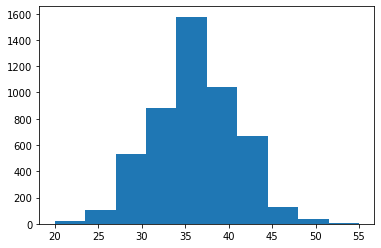

In [16]:
agents = 100 # number of agents
threshold = 60 # threshold for attendance
strategies = 2 # number of strategies
# number of weeks back in predictor function
# AND number of weeks back to look when selecting a predictor
memory = 2
# number of rounds to run the simulation
n_iter = 1
trials = 5000

# random seed for numpy
seed=25


p = (0.6**strategies)
print(f"We expect agents to attend with probability {p}.")
print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")

results = np.empty(trials)

rng = np.random.default_rng(seed)

for tr in range(trials):
    # each row is a strategy
    strats = [
        make_strategies(rng, strategies, memory) for _ in range(agents)
    ]

    start = np.array([100,0,100,0])

    # weekly attendance count
    # the first 2*memory weeks are randomly generated
    # to seed the strategies
    hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

    # index of week
    # we need some starting history to begin making selections
    t = memory * 2

    # Record the index of the optimal strategy 
    # on each iteration.
    # each row corresponds to an agent
    # each column corresponds to a week
    best_strats = np.zeros((agents, len(hist)))

    # record each agent's prediction on each iteration
    pred_history = np.zeros((agents, len(hist)))

    # construct time windows for evaluating strategies

    # The columns begin at
    # t - m - 1 
    # t - m
    # ...
    # t - 1
    # t
    # as you go down the column you are looking back
    # to that week's history.
    # so the column beginning at *t - m - 1*
    # generates the prediction for week *t - m*
    # and the rightmost column generates a
    # prediction for next week.
    windows = np.vstack([
        hist[t-memory-i-1: t-i]
        for i in range(memory)
    ])

    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is predicted attendance
        # in increasing order.
        # the last column has the prediction for
        # next week
        predictions = strat.dot(windows)

        # these are the observations that we use to
        # to test our predictions.
        # note that the observation from column 0
        # is not used since its prediction would come
        # from a previous week's history.
        observations = windows[0, 1:]

        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred

    hist[t] = (pred_history[:, t] < threshold).sum()
    results[tr] = hist[t]


plt.hist(results)

print(f"Average attendance: {results.mean()}")
print(f"Variance of attendance: {results.var()}")

#### The (100,0,100,0) case with 3 strategies

We expect agents to attend with probability 0.21599999999999997.
Total weekly attendance should have mean 21.599999999999998 and variance 16.9344
Average attendance: 21.5582
Variance of attendance: 16.83621276


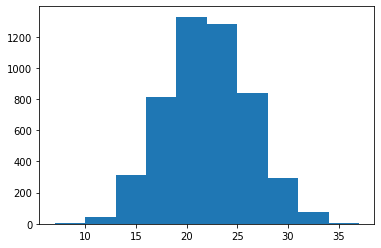

In [18]:
agents = 100 # number of agents
threshold = 60 # threshold for attendance
strategies = 3 # number of strategies
# number of weeks back in predictor function
# AND number of weeks back to look when selecting a predictor
memory = 2
# number of rounds to run the simulation
n_iter = 1
trials = 5000

# random seed for numpy
seed=25


p = (0.6**strategies)
print(f"We expect agents to attend with probability {p}.")
print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")

results = np.empty(trials)

rng = np.random.default_rng(seed)

for tr in range(trials):
    # each row is a strategy
    strats = [
        make_strategies(rng, strategies, memory) for _ in range(agents)
    ]

    start = np.array([100,0,100,0])

    # weekly attendance count
    # the first 2*memory weeks are randomly generated
    # to seed the strategies
    hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

    # index of week
    # we need some starting history to begin making selections
    t = memory * 2

    # Record the index of the optimal strategy 
    # on each iteration.
    # each row corresponds to an agent
    # each column corresponds to a week
    best_strats = np.zeros((agents, len(hist)))

    # record each agent's prediction on each iteration
    pred_history = np.zeros((agents, len(hist)))

    # construct time windows for evaluating strategies

    # The columns begin at
    # t - m - 1 
    # t - m
    # ...
    # t - 1
    # t
    # as you go down the column you are looking back
    # to that week's history.
    # so the column beginning at *t - m - 1*
    # generates the prediction for week *t - m*
    # and the rightmost column generates a
    # prediction for next week.
    windows = np.vstack([
        hist[t-memory-i-1: t-i]
        for i in range(memory)
    ])

    for agent in range(agents):
        strat = strats[agent]
        # each row is a strategy
        # each column is predicted attendance
        # in increasing order.
        # the last column has the prediction for
        # next week
        predictions = strat.dot(windows)

        # these are the observations that we use to
        # to test our predictions.
        # note that the observation from column 0
        # is not used since its prediction would come
        # from a previous week's history.
        observations = windows[0, 1:]

        # calculate the absolute error of predictions
        # here, we discard the rightmost prediction as
        # this is the prediction for the future.
        # if we knew the correct answer for that,
        # we wouldn't need to predict it!
        errs = np.abs(predictions[:, :-1] - observations).sum(axis=1)

        best_strat = np.argmin(errs)
        best_strats[agent, t] = best_strat

        pred = strat[best_strat].dot(windows[:,-1])
        pred_history[agent, t] = pred

    hist[t] = (pred_history[:, t] < threshold).sum()
    results[tr] = hist[t]


plt.hist(results)

print(f"Average attendance: {results.mean()}")
print(f"Variance of attendance: {results.var()}")

This all looks nice but what happens if the history contains arbitrary constants?

We will need to understand this to predict what happens on the next timestep.

Suppose our history looks like

$$(C_4, C_3, C_2, C_1)$$

Then

$$
\hat{N}^{(i)}(4) = C_3 + (C_2 - C_3) a^{(i)} \\ 
\hat{N}^{(i)}(3) = C_4 + (C_3 - C_4) a^{(i)}
$$
 
and we will pick the $a$ that minimizes
$$
|(C_3 - C_1) + (C_2 - C_3) a^{(i)}| + |(C_4 - C_2) + (C_3 - C_4) a^{(i)}|
$$

If we can work out a distribution for this $a$ then we can also consider longer memory windows (interactions between multiple a's).